In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
series = np.sin((0.1*np.arange(400))**2)


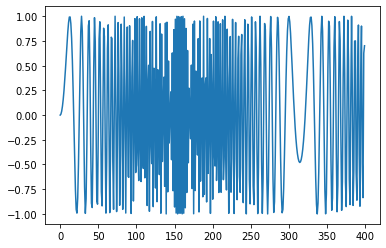

In [4]:
plt.plot(series)
plt.show()

In [7]:
T = 10
D = 1 
X = []
Y = []
for t in range(len(series) - T):
    x= series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
X = np.array(X).reshape(-1,T)
Y= np.array(Y)
N = len(X)

print("x.shape", X.shape)
print("y.shape", Y.shape)

x.shape (390, 10)
y.shape (390,)


### simple RNN model

In [32]:
X = X.reshape(-1, T, 1)

i = Input(shape = (T,1))
x = LSTM(10)(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(loss = "mse", optimizer= Adam(lr = 0.02))


r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size = 32,
    epochs = 200,
    validation_data = (X[-N//2:], Y[-N//2:])
)

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 10s 53ms/sample - loss: 0.5631 - val_loss: 0.4672
Epoch 2/200
195/195 [==============================] - 0s 409us/sample - loss: 0.5192 - val_loss: 0.5030
Epoch 3/200
195/195 [==============================] - 0s 414us/sample - loss: 0.5115 - val_loss: 0.5388
Epoch 4/200
195/195 [==============================] - 0s 399us/sample - loss: 0.4967 - val_loss: 0.5822
Epoch 5/200
195/195 [==============================] - 0s 404us/sample - loss: 0.4894 - val_loss: 0.5682
Epoch 6/200
195/195 [==============================] - 0s 404us/sample - loss: 0.4686 - val_loss: 0.5599
Epoch 7/200
195/195 [==============================] - 0s 404us/sample - loss: 0.4544 - val_loss: 0.5783
Epoch 8/200
195/195 [==============================] - 0s 394us/sample - loss: 0.4180 - val_loss: 0.5719
Epoch 9/200
195/195 [==============================] - 0s 406us/sample - loss: 0.3778 - val_loss: 0.5411
Epoch 10/

Epoch 78/200
195/195 [==============================] - 0s 394us/sample - loss: 0.0018 - val_loss: 0.1016
Epoch 79/200
195/195 [==============================] - 0s 384us/sample - loss: 0.0021 - val_loss: 0.1015
Epoch 80/200
195/195 [==============================] - 0s 382us/sample - loss: 0.0019 - val_loss: 0.1005
Epoch 81/200
195/195 [==============================] - 0s 373us/sample - loss: 0.0018 - val_loss: 0.0980
Epoch 82/200
195/195 [==============================] - 0s 368us/sample - loss: 0.0018 - val_loss: 0.1038
Epoch 83/200
195/195 [==============================] - 0s 378us/sample - loss: 0.0019 - val_loss: 0.0961
Epoch 84/200
195/195 [==============================] - 0s 373us/sample - loss: 0.0015 - val_loss: 0.1021
Epoch 85/200
195/195 [==============================] - 0s 379us/sample - loss: 0.0016 - val_loss: 0.0972
Epoch 86/200
195/195 [==============================] - 0s 384us/sample - loss: 0.0020 - val_loss: 0.1028
Epoch 87/200
195/195 [========================

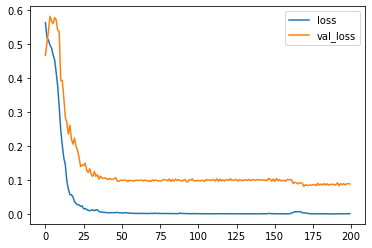

In [33]:
plt.plot(r.history['loss'], label= "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()
plt.show()

In [34]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]
print(predictions)

(390, 1)
[ 0.8457639   0.9677872   0.99404746  0.9941847   0.94301444  0.8089021
  0.5698777   0.23852481 -0.1303602  -0.4827808  -0.7853822  -0.9816995
 -0.97162133 -0.84564775 -0.49322283 -0.02688217  0.4663226   0.8436555
  1.0138936   0.8478594   0.42223018 -0.16808482 -0.7302722  -1.0054818
 -0.8559422  -0.36141384  0.38011968  0.92641264  0.9726874   0.48732316
 -0.31188917 -0.90717363 -0.9197348  -0.3260866   0.4847896   1.0022525
  0.7525385  -0.10929154 -0.86970574 -0.88592726 -0.09746386  0.7852681
  0.98060995  0.18931876 -0.7781114  -0.8962082  -0.01637812  0.8815356
  0.80531067 -0.24559073 -0.9932098  -0.43148893  0.6868036   0.9118746
 -0.11652288 -0.95454645 -0.35841     0.7884366   0.78952247 -0.45584297
 -0.9445748   0.17951126  0.9943778   0.10424177 -0.94128263 -0.26338536
  0.9643559   0.3779161  -0.89998    -0.38527     0.9219611   0.36475873
 -0.93100053 -0.20286429  0.964446   -0.01467652 -0.9788952   0.2619521
  0.90150905 -0.62710786 -0.5890326   0.88232815  0

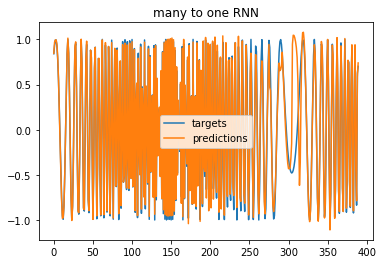

In [35]:
plt.plot(Y, label=  "targets")
plt.plot(predictions, label = "predictions")
plt.title("many to one RNN")
plt.legend()
plt.show()

In [36]:
outputs = model.predict(X)


#### 

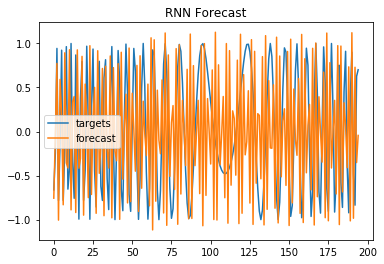

In [37]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
    # Reshape the input_ to N x T x D
    f = model.predict(input_.reshape(1, T, 1))[0,0]
    forecast.append(f)

    # make a new input with the latest forecast
    input_ = np.roll(input_, -1)
    input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()